In [2]:
# Построение автоэнкодера с единственным полносвязным нейронным слоем
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print('end')

end


In [3]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
# import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
# from keras.datasets import mnist
# import numpy as np

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('train')))
random.seed(13)
random.shuffle(imagePaths)
# print(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	# print(imagePath)
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	# label = 1 if label == "santa" else 0
	labels.append(label)
    

# scale the raw pixel intensities to the range [0, 1]
# data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float32") / 255

x_train = np.array(data, dtype="float") / 255.0

# x_test = np.array(data, dtype="float") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
labels = np.array(labels)
# Y_train = np_utils.to_categorical(labels, 4)

print(labels)

print('end')

[INFO] loading images...
['2' '1' '1' '0' '2' '3' '0' '1' '3' '1' '0' '2' '1' '2' '3' '1' '1' '0'
 '0' '1' '1' '3' '3' '2' '0' '0' '2' '2' '1' '2' '1' '2' '1' '1' '0' '3'
 '1' '0' '2' '3' '1' '0' '3' '0' '2' '0' '0' '3' '2' '3' '3' '0' '2' '0'
 '2' '0' '3' '3' '3' '3' '3' '2' '1' '2']
end


In [4]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
# from pyimagesearch.lenet import LeNet
from imutils import paths
# import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
# from keras.datasets import mnist
# import numpy as np

# initialize the data and labels
print("[INFO] loading images...")
data_test = []
labels_test = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('test')))
random.seed(13)
random.shuffle(imagePaths)
# print(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	# print(imagePath)
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data_test.append(image)

	# extract the class label_test from the image path and update the
	# labels_test list
	label_test = imagePath.split(os.path.sep)[-2]
	# label_test = 1 if label_test == "santa" else 0
	labels_test.append(label_test)
    

# scale the raw pixel intensities to the range [0, 1]
# data_test = np.array(data_test, dtype="float") / 255.0

# data_test = np.array(data_test, dtype="float32") / 255

# x_train = np.array(data_test, dtype="float") / 255.0
# y_train = np.array(data_test, dtype="float") / 255.0

x_test = np.array(data_test, dtype="float") / 255.0
# y_test = np.array(data_test, dtype="float") / 255.0
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# y_train = y_train.reshape((len(y_train), np.prod(y_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# y_test = y_test.reshape((len(y_test), np.prod(y_test.shape[1:])))
labels_test = np.array(labels_test)
# Y_train = np_utils.to_categorical(labels, 4)

print(labels_test)

print('end')

[INFO] loading images...
['1' '3' '0' '3' '0' '1' '1' '2' '2' '0' '3' '0' '3' '2' '1' '2']
end


In [5]:
from keras.callbacks import TensorBoard
import tensorflow as tf

# для запуска графика
# tensorboard --logdir=/tmp/autoencoder0
# http://any-hp:6006/

dirpath = '/tmp/autoencoder0'
if tf.gfile.Exists(dirpath):
   tf.gfile.DeleteRecursively(dirpath) 
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir=dirpath)])


scores = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores*100))
print('end')
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 0s 7ms/step - loss: 0.6549 - val_loss: 0.5913
Epoch 2/50
64/64 [==============================] - 0s 5ms/step - loss: 0.5707 - val_loss: 0.5698
Epoch 3/50
64/64 [==============================] - 0s 5ms/step - loss: 0.5577 - val_loss: 0.5637
Epoch 4/50
64/64 [==============================] - 0s 6ms/step - loss: 0.5489 - val_loss: 0.5521
Epoch 5/50
64/64 [==============================] - 0s 5ms/step - loss: 0.5379 - val_loss: 0.5411
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 0.5269 - val_loss: 0.5313
Epoch 7/50
64/64 [==============================] - 0s 8ms/step - loss: 0.5160 - val_loss: 0.5212
Epoch 8/50
64/64 [==============================] - 0s 7ms/step - loss: 0.5062 - val_loss: 0.5127
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 0.4988 - val_loss: 0.5078
Epoch 10/50
64/64 [==============================] - 0s 5ms/step - loss: 0

In [130]:
# model_json = model.to_json()
# json_file = open("photos_model.json", "w")
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
autoencoder.save_weights("photos_copy.h5")

In [75]:
# encode and decode some digits
# note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)

# decoded_imgs = decoder.predict(encoded_imgs)
# print(encoded_imgs[0])
# print(encoded_imgs)

# mean = encoded_imgs.mean(axis=0)
# std = encoded_imgs.std(axis=0)
# encoded_imgs -= mean
# encoded_imgs /= std
# print(encoded_imgs[0])


# print('end')

In [16]:
import numpy
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import np_utils

# numpy.random.seed(59)

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

# Y_train = np_utils.to_categorical(y_train, 4)
# Y_test = np_utils.to_categorical(y_test, 4)

X_train =  encoder.predict(x_train)
Y_train = np_utils.to_categorical(labels, 4)

X_test =  encoder.predict(x_test)
Y_test = np_utils.to_categorical(labels_test, 4)

# print(X_train)
# print(Y_train)

model = Sequential()

model.add(Dense(32, input_dim=32, init="normal", activation="relu"))
model.add(Dense(4, init="normal", activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD",  metrics=["accuracy"])

print(model.summary())



C:\Users\Any\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=32, activation="relu", kernel_initializer="normal")`
C:\Users\Any\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="softmax", kernel_initializer="normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 132       
Total params: 1,188
Trainable params: 1,188
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.fit(X_train,
          Y_train,
          epochs=10,
          batch_size=1,
          shuffle=True,
         verbose=1)

scores = model.evaluate(X_test, Y_test, verbose=0)
print(scores)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Epoch 1/10
64/64 [==============================] - 1s 15ms/step - loss: 1.0198 - acc: 0.7812
Epoch 2/10
64/64 [==============================] - 0s 4ms/step - loss: 0.2914 - acc: 1.0000
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0824 - acc: 1.0000
Epoch 4/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0418 - acc: 1.0000
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0267 - acc: 1.0000
Epoch 6/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0189 - acc: 1.0000
Epoch 7/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0146 - acc: 1.0000
Epoch 8/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0117 - acc: 1.0000
Epoch 9/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 1.0000
Epoch 10/10
64/64 [==============================] - 0s 4ms/step - loss: 0.0083 - acc: 1.0000
[0.01799420453608036, 1.0]
Точность работы на тестовых данных: 100.0

16
[ 6  1  0 10 14  4  3 12  8  2 15  9 11  5  7 13]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 0 1]
[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 0 1]
[0 0 1 0]
[1 0 0 0]
[0 0 1 0]
[1 0 0 0]
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 1 0]


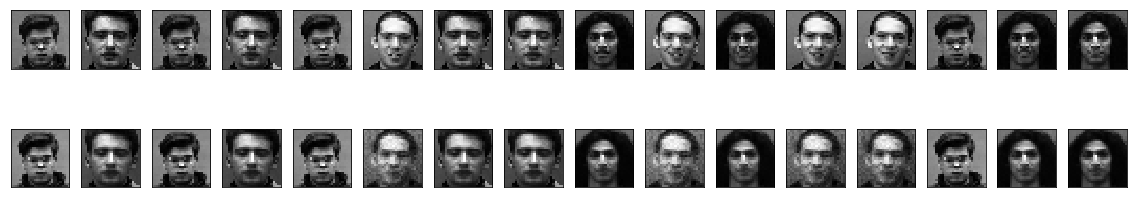

[[1.5127097e-03 9.9575883e-01 1.9338434e-03 7.9465727e-04]
 [1.0526769e-02 1.7260826e-03 4.4062249e-03 9.8334092e-01]
 [9.8697448e-01 3.5466449e-03 1.0008286e-03 8.4781330e-03]
 [1.0469854e-02 1.7242414e-03 4.8167338e-03 9.8298913e-01]
 [9.7995090e-01 5.6124367e-03 1.9223125e-03 1.2514412e-02]
 [2.5771772e-03 9.9310112e-01 2.9473070e-03 1.3743489e-03]
 [3.3054564e-03 9.9132639e-01 3.6241002e-03 1.7440381e-03]
 [9.1797370e-04 1.8551669e-03 9.9519509e-01 2.0317240e-03]
 [5.9287361e-04 1.2075236e-03 9.9637336e-01 1.8262210e-03]
 [9.7437119e-01 5.6614713e-03 2.6301623e-03 1.7337110e-02]
 [6.8054507e-03 1.2686420e-03 3.3351209e-03 9.8859078e-01]
 [9.2473310e-01 9.9282730e-03 6.7979004e-03 5.8540791e-02]
 [8.0494648e-03 1.4665353e-03 3.8641212e-03 9.8661983e-01]
 [5.3281907e-04 1.2565510e-03 9.9651814e-01 1.6924657e-03]
 [2.4894220e-03 9.9298370e-01 3.1297836e-03 1.3971812e-03]
 [9.5332152e-04 2.1960714e-03 9.9465704e-01 2.1935818e-03]]


In [14]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np


x_data = x_test
y_data = labels_test
encoded_imgs = encoder.predict(x_data)

decoded_imgs = decoder.predict(encoded_imgs)

true_categorical_class = np_utils.to_categorical(y_data, 4)


prediction = model.predict(encoded_imgs)

categorical_class = (prediction == prediction.max(axis=1, keepdims=True)).astype(int)
# print(categorical_class)
n = len(categorical_class)  # how many digits we will display
print(len(categorical_class))
indexes = np.random.permutation(len(categorical_class))
print(indexes)
# random.seed(59)
# random.shuffle(imagePaths)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    # print(x_test[i])
    # prediction = model.predict(encoded_imgs[i])
    # categorical_class = np_utils.categorical_probas_to_classes(prediction)
    print(categorical_class[indexes[i]])
    plt.imshow(x_data[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[indexes[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print(prediction)
